# NYC's new COVID-19 cases, hospitalizations, and deaths over time

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file = '../data/nychealth-coronavirus-data/case-hosp-death.csv'
df = pd.read_csv(file)
df

,DATE_OF_INTEREST,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
0,3/2/20,1,3.0,NaN
1,3/3/20,2,2.0,NaN
2,3/4/20,10,4.0,NaN
3,3/5/20,2,4.0,NaN
4,3/6/20,8,5.0,NaN
5,3/7/20,13,9.0,NaN
6,3/8/20,20,12.0,NaN
7,3/9/20,53,24.0,NaN
8,3/10/20,70,38.0,NaN
9,3/11/20,156,56.0,1.0


In [3]:
df.columns

Index(['DATE_OF_INTEREST', 'NEW_COVID_CASE_COUNT', 'HOSPITALIZED_CASE_COUNT',
       'DEATH_COUNT'],
      dtype='object')

In [4]:
df.columns = ['date', 'cases', 'hosps', 'deaths']

In [5]:
df.tail()

,date,cases,hosps,deaths
27,3/29/20,2369,739.0,166.0
28,3/30/20,3531,781.0,160.0
29,3/31/20,2192,500.0,180.0
30,4/1/20,1047,117.0,145.0
31,4/2/20,82,NaN,13.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    32 non-null     object 
 1   cases   32 non-null     int64  
 2   hosps   31 non-null     float64
 3   deaths  21 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [9]:
[df.date[0], type(df.date[0])]

['3/2/20', str]

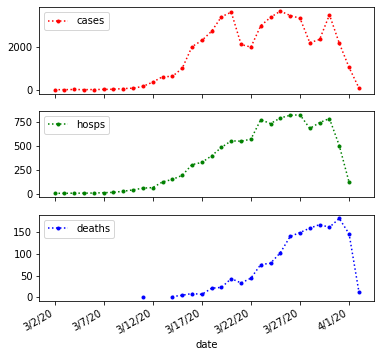

In [33]:
colors = ['red', 'green', 'blue']

df.plot(x='date', y=['cases', 'hosps', 'deaths'],
        figsize=(6, 6), color=colors, linestyle=':', marker='.', subplots=True)

plt.show()